In [122]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [123]:
# Calculate B field in ideal ATLAS toroid as function of radius [m]
def B(R):
    Rin = 1.05
    Rout = 5.10
    Bmax = 4.1
    if R < Rin :
        return 0
    elif R > Rout :
        return 0
    return Bmax*Rin/R

In [124]:
B(5.1)

0.8441176470588235

In [125]:
# sagitta in toroid given p[GeV], radius in toroid [m], and length traversed [m]
def sagitta (p, r, l): 
    return 0.3/8*l*l*B(r)/p

In [126]:
# Calculate eta from Theta
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [127]:
# Calculate Theta from R and Z
def ThetaRZ(R,Z):
    return np.arctan(R/Z)

In [128]:
def EtaRZ(R,Z):
    return Eta(ThetaRZ(R,Z))

In [129]:
rmin = 1.05
rmax = 5.10
len = 5.0
pgen = 900
dr = 0.1
res = 200 # position res in microns
Zpos1 = 60 # m first station location
Zpos2 = 300 # m second station location
rvalues = np.arange(rmin, rmax, dr)
bvalues = [0] * rvalues.size
svalues = [0] * rvalues.size
drvalues = [0] * rvalues.size
resvalues = [0] * rvalues.size
etavalues1  = [0] * rvalues.size
etavalues2  = [0] * rvalues.size
for i in range(rvalues.size):
  bvalues[i] = B(rvalues[i])
  svalues[i] = sagitta(pgen,rvalues[i],len)*1E6
  drvalues[i] = 2*svalues[i]
  resvalues[i] = res*np.sqrt(2)/(2*svalues[i])*100 # sqrt(2) because difference of two r measurements
  etavalues1[i] = EtaRZ(rvalues[i],Zpos1)
  etavalues2[i] = EtaRZ(rvalues[i],Zpos2)

Text(0.5, 0, 'r [m]')

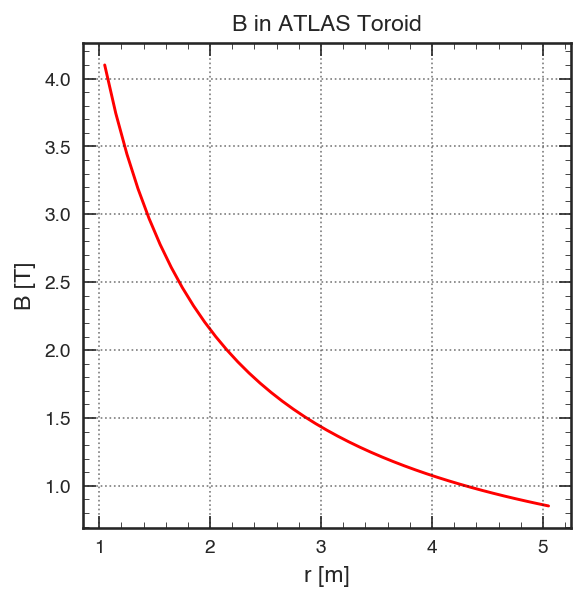

In [130]:
plt.plot(rvalues, bvalues,'r')
plt.title('B in ATLAS Toroid')
plt.ylabel('B [T]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

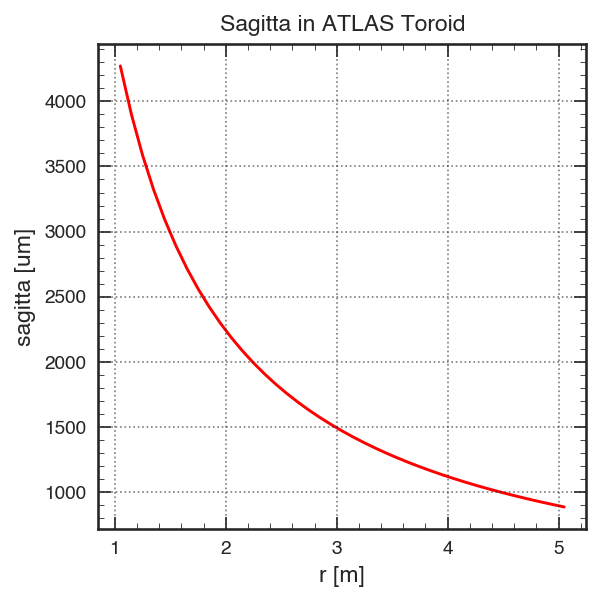

In [131]:
plt.plot(rvalues, svalues,'r')
plt.title('Sagitta in ATLAS Toroid')
plt.ylabel('sagitta [um]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

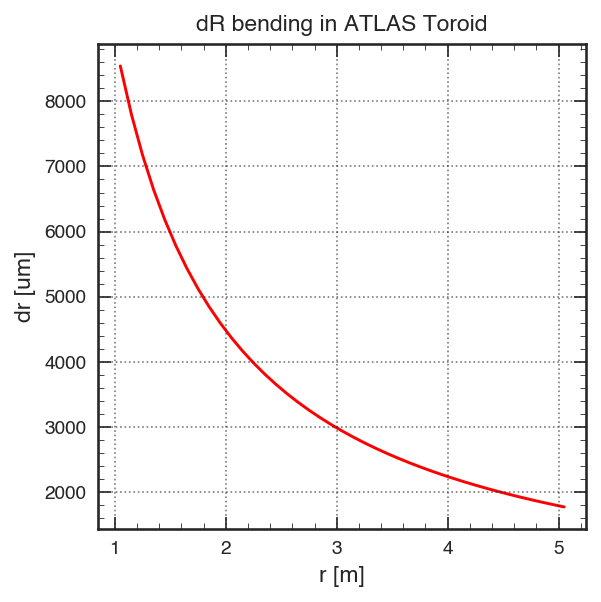

In [132]:
plt.plot(rvalues, drvalues,'r')
plt.title('dR bending in ATLAS Toroid')
plt.ylabel('dr [um]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

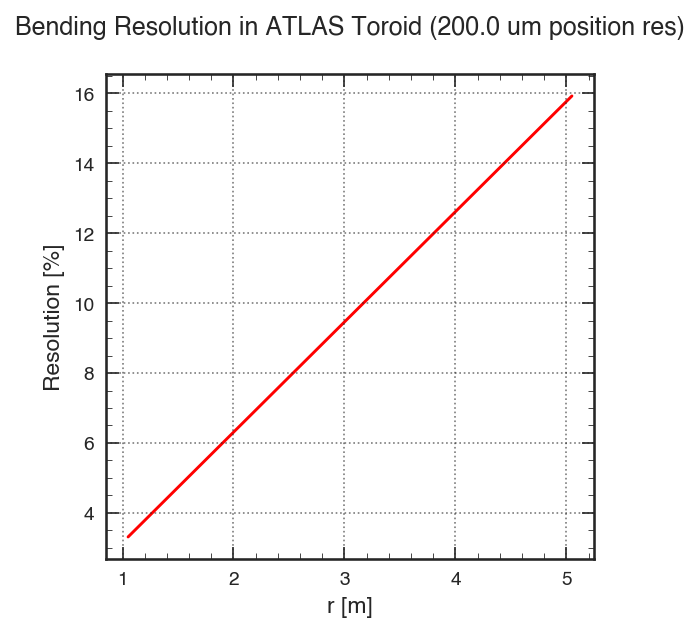

In [133]:
plt.plot(rvalues, resvalues,'r')
plt.title('Bending Resolution in ATLAS Toroid (%.1f um position res)\n' %(res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('r [m]')

In [134]:
EtaRZ(5,60)

3.179785437699879

Text(0.5, 0, 'eta')

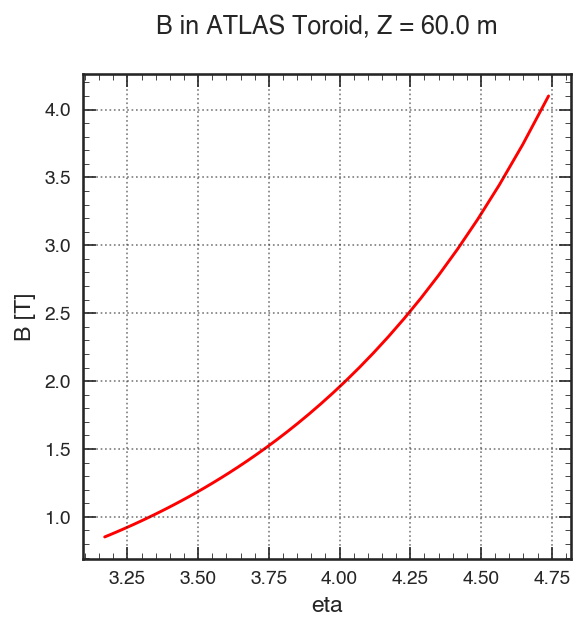

In [135]:
plt.plot(etavalues1, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos1), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

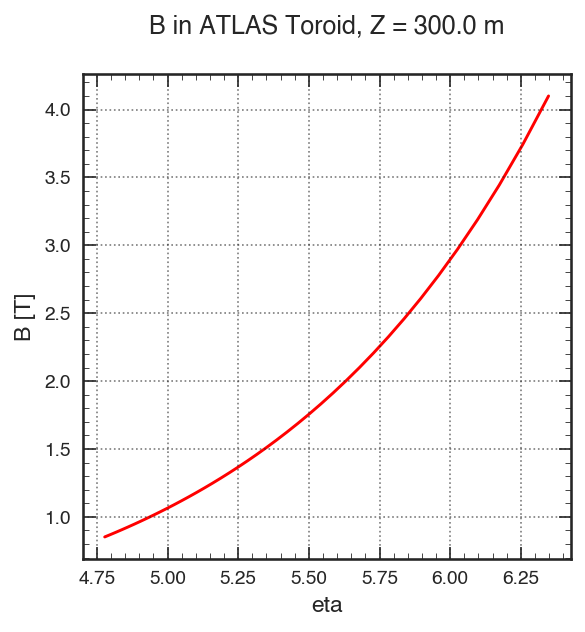

In [136]:
plt.plot(etavalues2, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos2), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

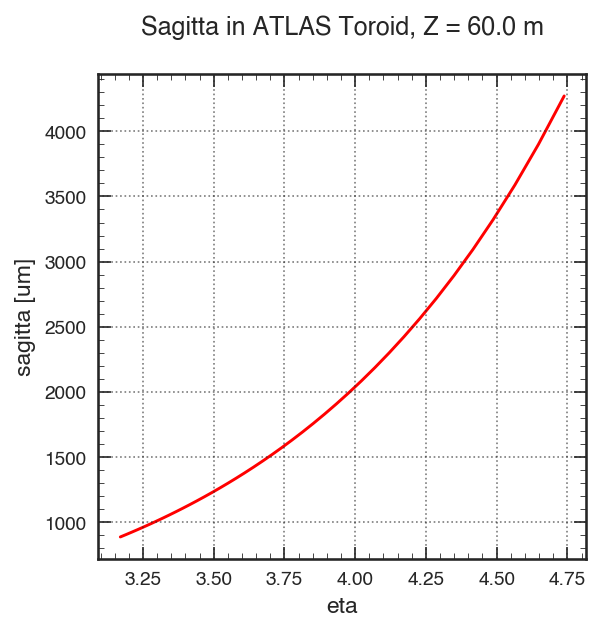

In [137]:
plt.plot(etavalues1, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, Z = %.1f m\n' %(Zpos1), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

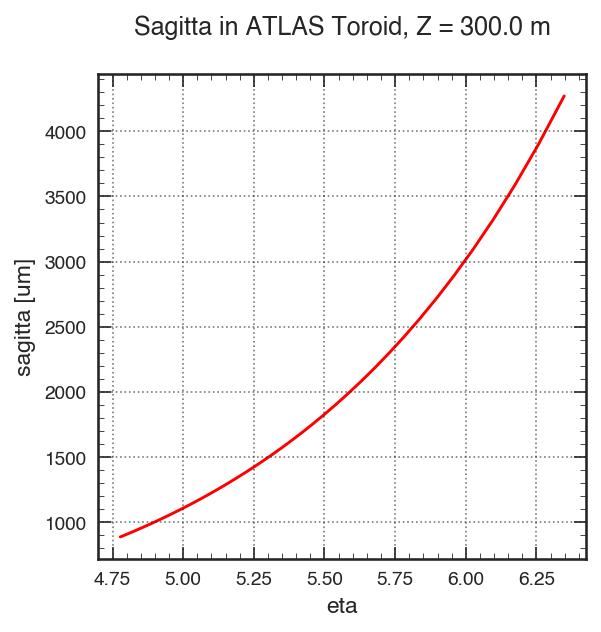

In [138]:
plt.plot(etavalues2, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, Z = %.1f m\n' %(Zpos2), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

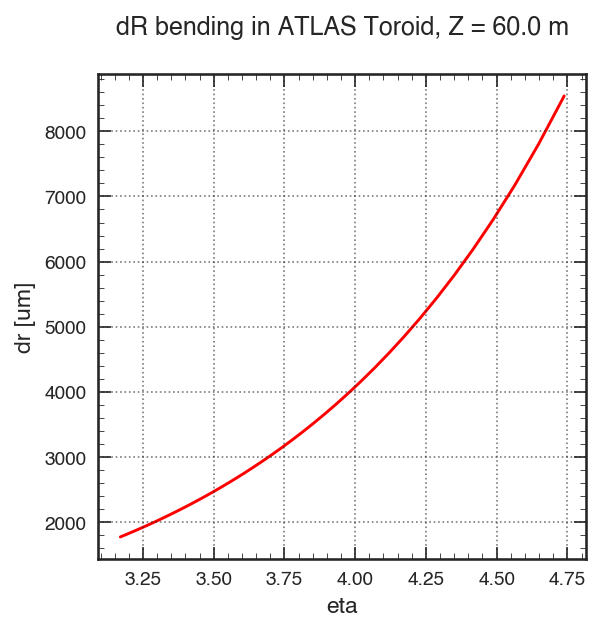

In [139]:
plt.plot(etavalues1, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, Z = %.1f m\n' %(Zpos1), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

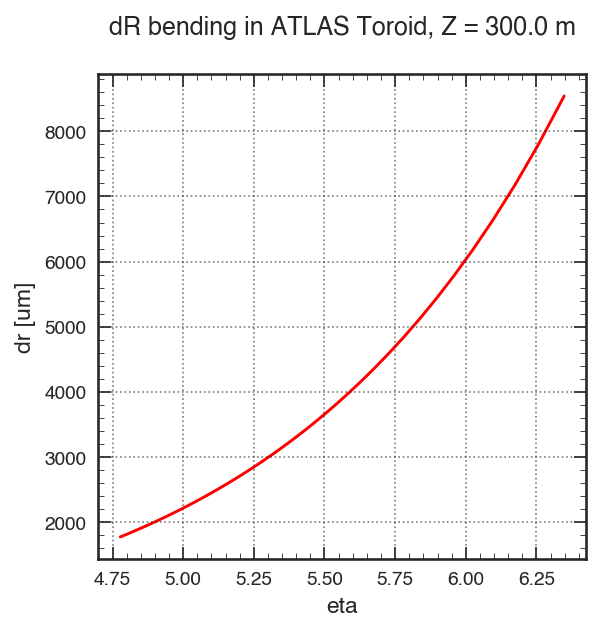

In [140]:
plt.plot(etavalues2, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, Z = %.1f m\n' %(Zpos2), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

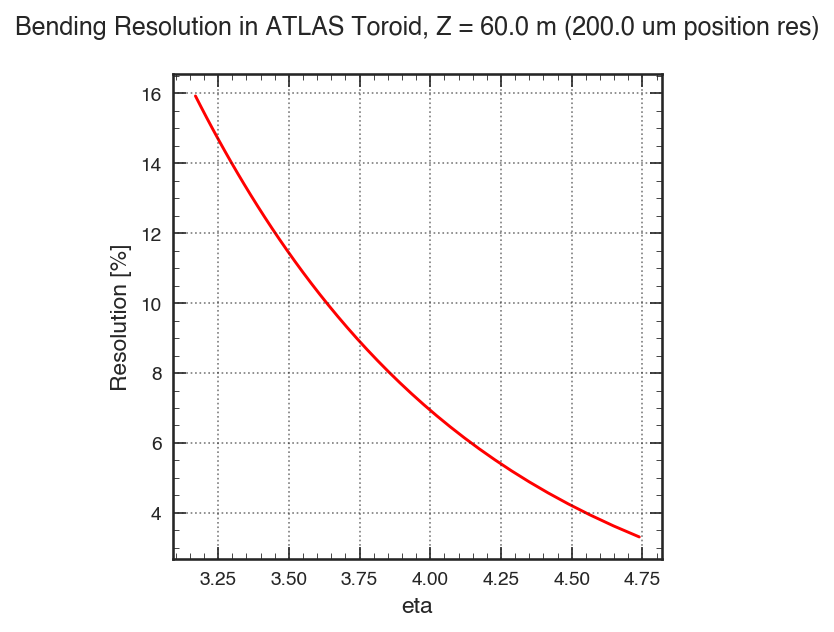

In [141]:
plt.plot(etavalues1, resvalues,'r')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m (%.1f um position res)\n' %(Zpos1, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

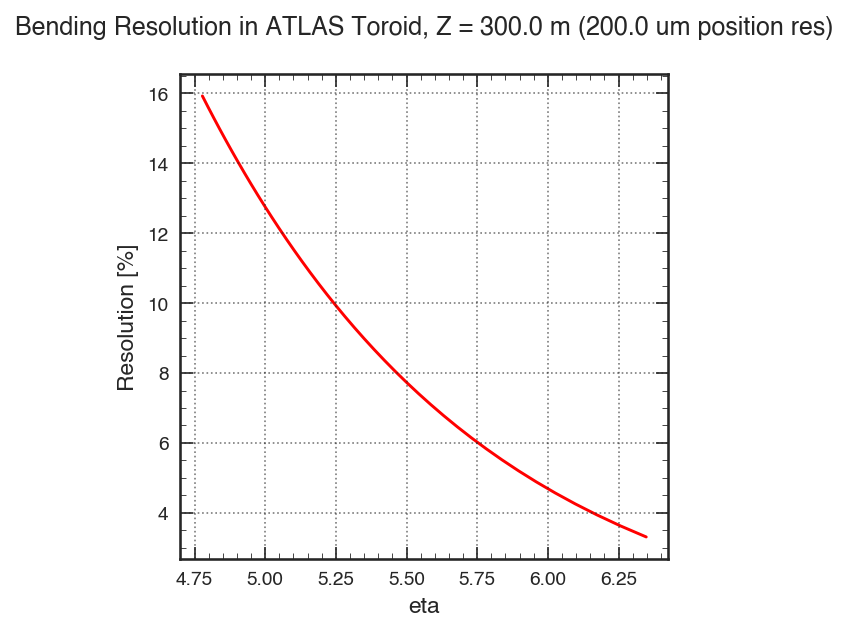

In [142]:
plt.plot(etavalues2, resvalues,'r')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m (%.1f um position res)\n' %(Zpos2, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')